# Convert the AE waveform

Convert the AE waveform for the MWE of ARX calibration.

2023.08.10 Kurama Okubo

In [1]:
import os
import obspy
from obspy import read, Stream, Trace
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from glob import glob
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm import tqdm
import scipy.io as sio
import pickle
import warnings
from obspy.core.utcdatetime import UTCDateTime    
from remove_resp_digitalfilt import *
import obspy.signal

%load_ext autoreload
%autoreload 2

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

    
os.environ['TZ'] = 'GMT' # change time zone to avoid confusion in unix_tvec conversion

# Load data

In [2]:
st = read("../data/obs_waveform_event__fb03-087__0000.pickle")

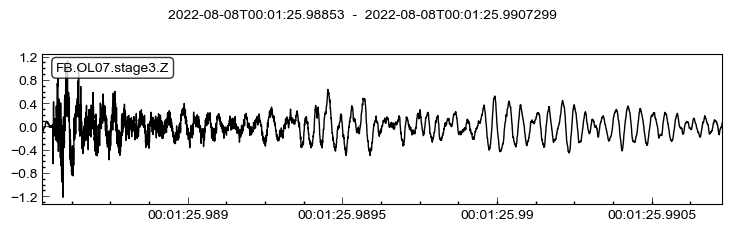

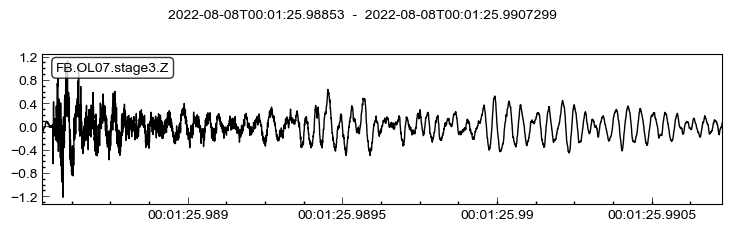

In [3]:
# before resp removal
stid = "OL07"
tr_before = st.select(station=stid, location="stage3")[0] # stage 2 is just after the removal of preamp resp
tr_before.plot()

In [4]:
# preprocess, bandpath and trimming the waveform
twinlen = 0.5e-3
freqmin, freqmax = 0.6e5, 6e5 
tr_before_trim_filt = tr_before.copy().detrend(type='constant').detrend(type='linear').taper(0.01).filter("bandpass", freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True).trim(tr_before.stats.starttime, tr_before.stats.starttime+twinlen)


/Users/kokubo/miniconda3/envs/obspy3.11/lib/python3.11/site-packages/obspy/core/utcdatetime.py:1073: ObsPyDeprecationWarning: Comparing UTCDateTime objects of different precision is not defined will raise an Exception in a future version of obspy
  warnings.warn(msg, ObsPyDeprecationWarning)


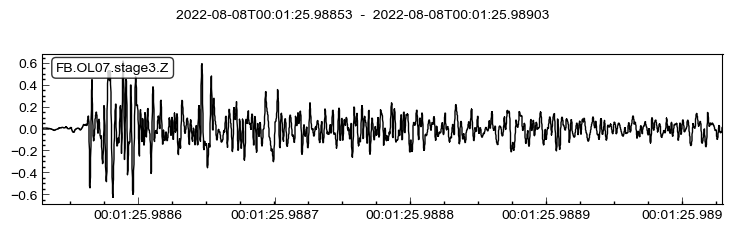

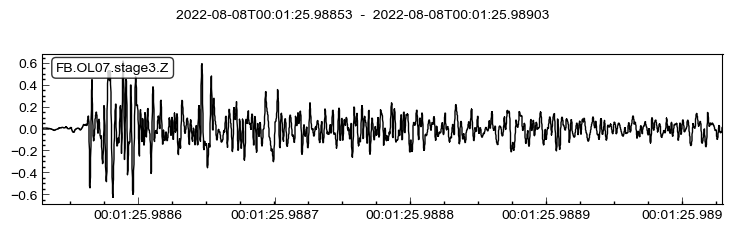

In [5]:
tr_before_trim_filt.plot()

In [6]:
# dump the trace
tr_before_trim_filt.write(f"../data/AE_waveform_fb03-087_{stid}.sac", format="SAC")  